<a href="https://colab.research.google.com/github/choiseoyoungg/class_deeplearningportpolio/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


<function matplotlib.pyplot.show(close=None, block=None)>

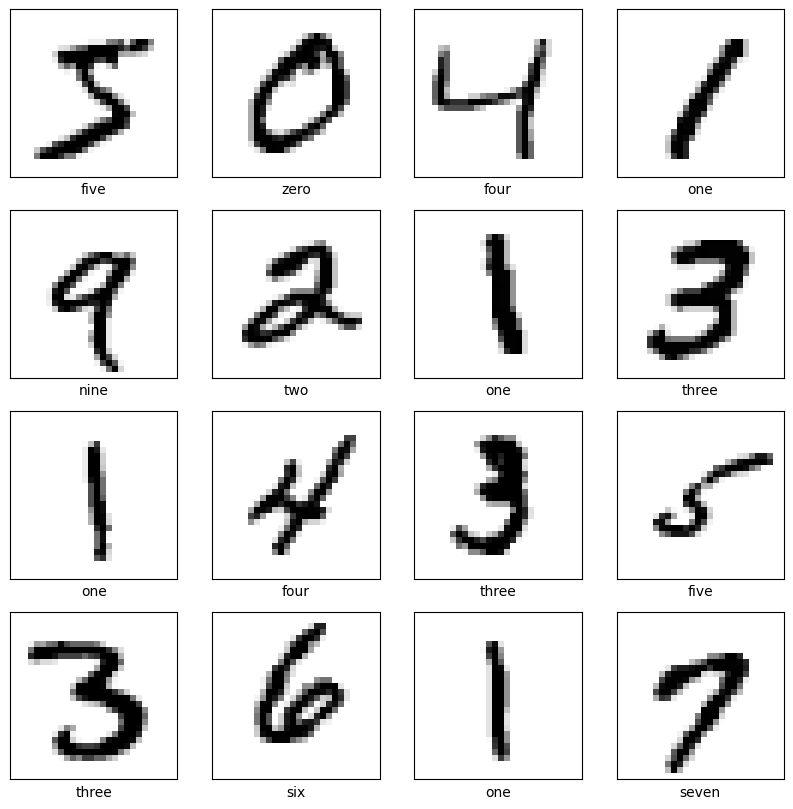

In [3]:
class_names=['zero','one','two','three','four','five','six','seven','eight','nine']

plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1) #가로,세로 출력 크기
  plt.xticks([])
  plt.yticks([])
  img=x_train[i].reshape(28,28)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])


plt.show

In [4]:
#parameters
learning_rate=0.01
training_steps=1000
batch_size=256   #빅데이터 한번에 학습시 메모리부족 직면, 쪼개지는 샘플의 수


#mnist dataset parameters
num_classes=10
num_features=784

In [5]:
#convert to float32
x_train, x_test=np.array(x_train, np.float32), np.array(x_test, np.float32)


x_train, x_test= x_train.reshape([-1,num_features]),x_test.reshape([-1,num_features])
print(x_train.shape,x_test.shape)

#normalize images(데이터단위 통일을 위해)
x_train,x_test=x_train/255, x_test/255

(60000, 784) (10000, 784)


In [6]:
#hypothesis and prediction function

W=tf.Variable(tf.ones([num_features, num_classes]),name="weight")
b=tf.Variable(tf.zeros([num_classes]),name="bias")


In [7]:
#softmax function

def softmax(x):
  z=tf.matmul(x,W)+b
  sm=tf.nn.softmax(z)
  return sm


#cross enteropy cost/loss function
def cross_entropy(y_pred, y_true):
  y_true=tf.one_hot(y_true, depth=num_classes)

  y_pred=tf.clip_by_value(y_pred, 1e-9, 1.)

  return tf.reduce_mean(-tf.reduce_sum(y_true*tf.math.log(y_pred),axis=1))


#minimize cost function
optimizer=tf.optimizers.SGD(learning_rate)

In [8]:
#Accuracy metric
def accuracy(y_pred, y_true):
  correct_prediction=tf.equal(tf.argmax(y_pred,1),tf.cast(y_true,tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
#optimization process
def run_optimization(x,y):
  with tf.GradientTape() as g:
    pred=softmax(x)
    cost=cross_entropy(pred,y)

  #자동미분
  gradients=g.gradient(cost,[W,b])
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [10]:
#직관적인 코드
n_train=x_train.shape[0]
n_test=x_test.shape[0]

def train_batch_maker(betch_size):
  random_idx=np.random.randint(n_train, size=batch_size)
  return x_train[random_idx],y_train[random_idx]

def test_batch_maker(batch_size):
  random_idx=np.random.randint(n_test, size=batch_size)
  return x_test[random_idx], y_test[random_idx]

In [11]:
for step in range(training_steps):
  batch_x, batch_y=train_batch_maker(batch_size)

  #run optimization to update W and b values
  run_optimization(batch_x,batch_y)

  if step%100==0:
    pred=softmax(batch_x)
    cost=cross_entropy(pred,batch_y)
    acc=accuracy(pred,batch_y)
    print("step:%i,loss:%f,accuracy:%f"%(step,cost,acc))
    
#loss값 줄이는 과정 

step:0,loss:2.286159,accuracy:0.382812
step:100,loss:1.524374,accuracy:0.820312
step:200,loss:1.163537,accuracy:0.812500
step:300,loss:1.036838,accuracy:0.773438
step:400,loss:0.863582,accuracy:0.847656
step:500,loss:0.762747,accuracy:0.859375
step:600,loss:0.733521,accuracy:0.851562
step:700,loss:0.712706,accuracy:0.832031
step:800,loss:0.607367,accuracy:0.875000
step:900,loss:0.691976,accuracy:0.812500


In [12]:

pred=softmax(x_test)
print("Test Accuracy:%f"%accuracy(pred,y_test))


Test Accuracy:0.869600


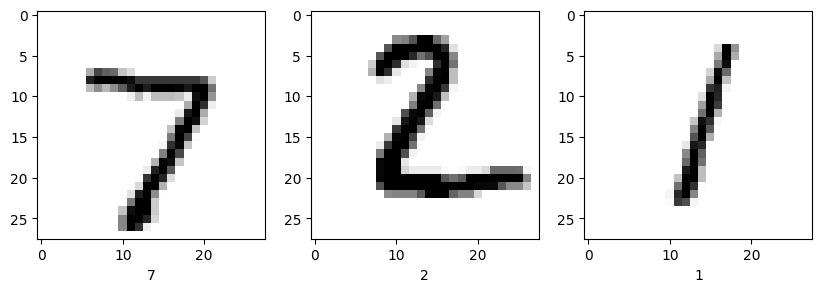

In [15]:

n_images=3
test_images=x_test[:n_images]
predictions=softmax(test_images)


#display image and model prediction
plt.figure(figsize=(10,10))
for i in range(n_images):
  plt.subplot(1,3,i+1)
  plt.imshow(np.reshape(test_images[i], [28,28]),cmap=plt.cm.binary)
  plt.xlabel(np.argmax(predictions.numpy()[i]))
plt.show()